In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def convolve(W: np.ndarray, X: np.ndarray) -> np.ndarray:
    filter_width, filter_height = W.shape

    input_width, input_height = X.shape

    output_width = int(input_width - filter_width + 1)
    output_height = int(input_height - filter_height + 1)

    output = np.zeros((output_width, output_height))

    for i in range(output_width):
        for j in range(output_height):
            x = X[i:i + filter_width, j:j + filter_height]

            output[i, j] = np.dot(W.ravel(), x.ravel())

    return output

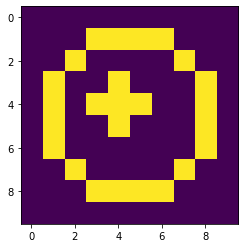

In [3]:
X = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


plt.imshow(X)
plt.show()

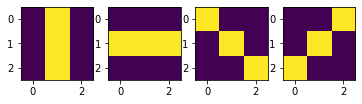

In [4]:
W1 = np.array([[0, 1, 0],
               [0, 1, 0],
               [0, 1, 0]])
W2 = np.array([[0, 0, 0],
               [1, 1, 1],
               [0, 0, 0]])

W3 = np.array([[1, 0, 0],
               [0, 1, 0],
               [0, 0, 1]])

W4 = np.array([[0, 0, 1],
               [0, 1, 0],
               [1, 0, 0]])


fig = plt.figure()

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.imshow(W1)
ax2.imshow(W2)
ax3.imshow(W3)
ax4.imshow(W4)

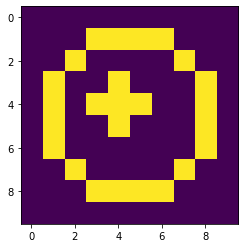

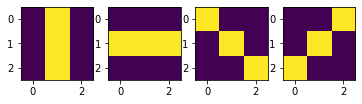

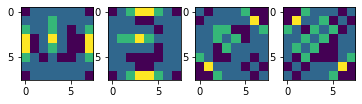

In [5]:
plt.imshow(X)

fig = plt.figure()

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.imshow(W1)
ax2.imshow(W2)
ax3.imshow(W3)
ax4.imshow(W4)


fig = plt.figure()

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.imshow(convolve(W1, X))
ax2.imshow(convolve(W2, X))
ax3.imshow(convolve(W3, X))
ax4.imshow(convolve(W4, X))


plt.show()

In [6]:
import unittest

import numpy as np
from numpy.testing import assert_array_equal


class Conv1D:
    def __init__(self, kernel: np.ndarray):
        self.kernel = kernel

    def forward(self, img: np.ndarray) -> np.ndarray:
        kernel_width, kernel_height = self.kernel.shape

        ret = []

        final_width = img.shape[0] - kernel_width + 1
        final_height = img.shape[1] - kernel_height + 1

        for idx in range(final_width):
            for jdx in range(final_height):
                hoge = img[idx:kernel_width + idx, jdx:kernel_height + jdx]
                fuga = hoge * self.kernel
                ret.append(fuga.sum())

        ret = np.array(ret).reshape((final_width, final_height))

        return ret
    
c = Conv1D(kernel=W1)    

c.forward(img=X)

array([[0, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 2, 1, 1, 1, 1],
       [2, 1, 1, 2, 1, 0, 1, 2],
       [3, 0, 1, 3, 1, 0, 0, 3],
       [3, 0, 1, 2, 1, 0, 0, 3],
       [2, 1, 0, 1, 0, 0, 1, 2],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 0]])